In [1]:
import mysql.connector
import matplotlib.pyplot as plt


try:
    conn = mysql.connector.connect(
        host='localhost',       
        user='root',            
        password='harden13YRC.',  
        database='tpch'         
    )
    cursor = conn.cursor()
    print("✅ Successfully connected to TPCH database")
except mysql.connector.Error as err:
    print(f"❌ Error: {err}")
    exit()

✅ Successfully connected to TPCH database


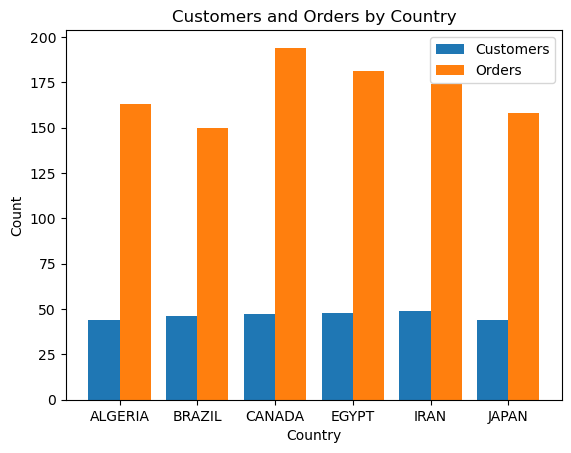

In [2]:
query1 = """
SELECT 
    n.n_name AS nation,
    COUNT(DISTINCT c.c_custkey) AS customers,
    COUNT(DISTINCT o.o_orderkey) AS orders
FROM nation n
JOIN customer c ON n.n_nationkey = c.c_nationkey
JOIN orders o ON c.c_custkey = o.o_custkey
WHERE YEAR(o.o_orderdate) = 2018
GROUP BY n.n_name
HAVING COUNT(DISTINCT c.c_custkey) > 43;
"""

cursor.execute(query1)
results = cursor.fetchall()


nations = [row[0] for row in results]
customers = [row[1] for row in results]
orders = [row[2] for row in results]


x = range(len(nations))
plt.bar(x, customers, width=0.4, label='Customers')
plt.bar([i + 0.4 for i in x], orders, width=0.4, label='Orders')
plt.xticks([i + 0.2 for i in x], nations)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Customers and Orders by Country")
plt.legend()
plt.show()

In [3]:
try:
    cust_id = int(input("Enter a customer id: "))
except ValueError:
    print("Invalid input. Please enter a numeric ID.")
    conn.close()
    exit()

query2 = """
SELECT 
    l.l_partkey AS PartKey,
    SUM(l.l_quantity) AS TotalQuantity
FROM lineitem l
JOIN orders o ON l.l_orderkey = o.o_orderkey
JOIN customer c ON o.o_custkey = c.c_custkey
WHERE c.c_custkey = %s
  AND o.o_orderstatus = 'O'
  AND c.c_acctbal < 1000
GROUP BY l.l_partkey
ORDER BY TotalQuantity DESC
LIMIT 5;
"""

cursor.execute(query2, (cust_id,))
top_products = cursor.fetchall()

print(f"\nTop 5 products for customer: {cust_id}")
print("PartKey\tTotal Quantity")
for row in top_products:
    print(f"{row[0]}\t{row[1]:.2f}")



Enter a customer id:  788



Top 5 products for customer: 788
PartKey	Total Quantity
1835	124.00
508	91.00
1264	49.00
1727	49.00
1520	47.00
